In [1]:
from KRZmetric import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
E,Lz,Q=getELQ(0.5,6,np.pi/4,0.5)
E,Lz,Q

(0.946987591328603, 2.2934844203095666, 5.2729725989364153)

In [3]:
#E=0.94589652471825014; Lz= 3.3004165358647404;
#E=0.94598455507288925;Lz=2.7571886342007876
#Q=3.472195
M=2e5;spin=0.5;d2=0;d3=0
d1=0.2
Q=5.155543
filenamekrz2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\3D\\3D\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,E,Lz,Q,d1,d2,d3)
#filenamekrz2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\3D\\3D\\trace_M200000_spin0.500000_E0.946988_Lz2.293484_Q5.155543_d10.200000_d20.000000_d30.000000.dat'

In [4]:
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filenamekrz2,unpack=True)

In [5]:
x=r*np.sin(th)*np.cos(phi)
y=r*np.sin(th)*np.sin(phi)
z=r*np.cos(th)

In [6]:
ra=np.max(r)
rp=np.min(r)
th_max=np.max(th)
th_min=np.min(th)
pkrz=2/(1/ra+1/rp)
ekrz=(ra-rp)/(ra+rp)
iotakrz=np.pi/2-th_min
pkrz,ekrz,iotakrz

(6.8194040962894134, 0.43177789582029535, 0.77975622989489657)

In [7]:
###以后在这里加上测omg，再调 M,spin,p的代码

Ek,Lzk,Qk=0.94967622720035072, 2.3525922607713579, 5.4260018486370463
myspin,myM=0.55277040686568601,187391.63231679416

In [14]:
#filenamekerr='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\3D\\3D\\trace_M187584_spin0.554285_E0.949636_Lz2.351645_Q5.421746_d10.000000_d20.000000_d30.000000.dat'
filenamekerr='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\3D\\3D\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(myM,myspin,Ek,Lzk,Qk,0,0,0)

In [15]:
index, tauk,tk,rk,thk,phik,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filenamekerr,unpack=True)

In [24]:
dt=0.5
kerrwave=getwave(filenamekerr,np.pi/4,0)

In [25]:
krzwave=getwave(filenamekrz2,np.pi/4,0)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(90000, 94000)

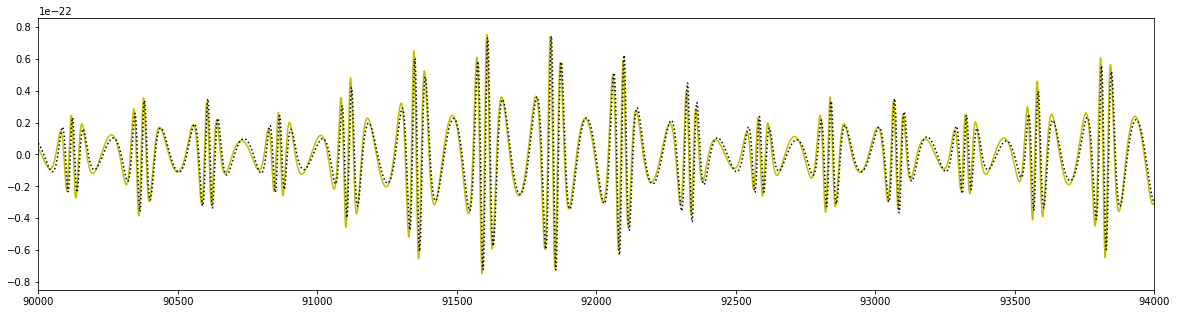

In [37]:
plt.figure(figsize=[20,5])
plt.plot(np.arange(len(krzwave[1]))*dt,krzwave[1],'y',label='KRZ' )
plt.plot(np.arange(len(kerrwave[1]))*dt,kerrwave[1],'k:',label='Kerr' )
plt.xlim(90000,94000)

In [16]:
xk=rk*np.sin(thk)*np.cos(phik)
yk=rk*np.sin(thk)*np.sin(phik)
zk=rk*np.cos(thk)

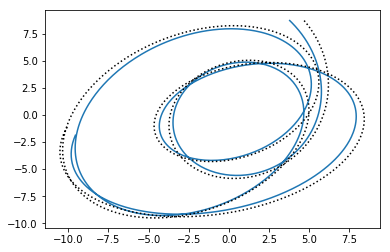

In [21]:
ts=100000
tend=101000
plt.plot(x[ts:tend],y[ts:tend])
plt.plot(xk[ts:tend],yk[ts:tend],':k')

Text(0.5,0,'z/M')

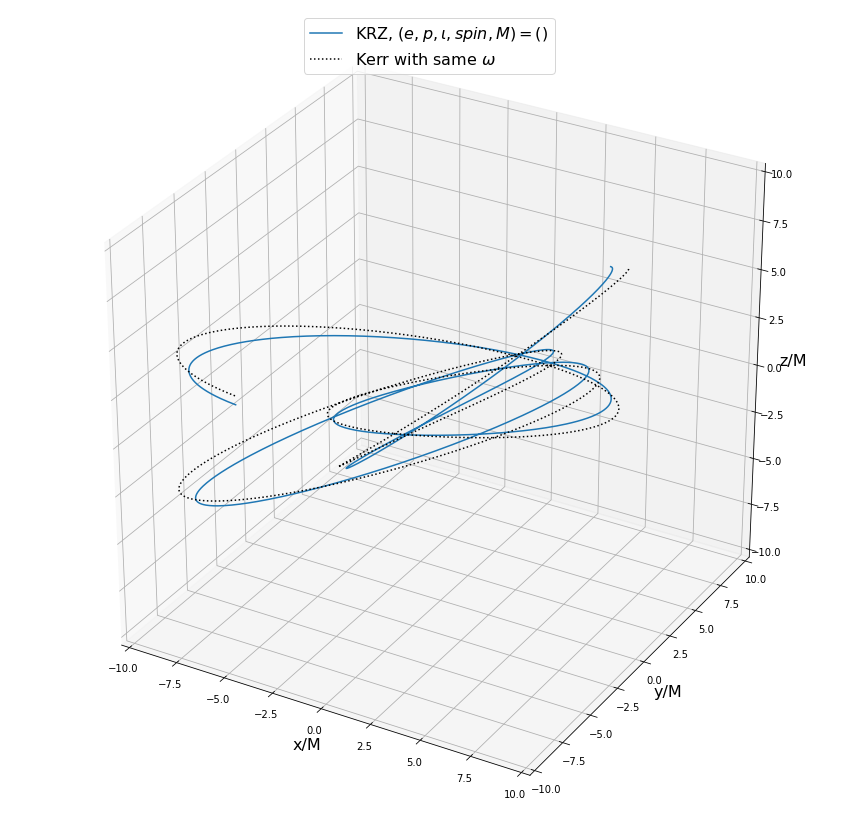

In [22]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.gca(projection='3d')
myx=[]
myy=[]
myz=[]
#ax.axis([-10,10,-10,10])
#ax.set_xticks(np.linspace(-10,10,10))
#ax.set_yticks(np.linspace(-10,10,10))
#ax.set_zticks(np.linspace(-10,10,10))
#for i in np.arange(index.size):
    #myx.append(x[i])
    #myy.append(y[i])
    #myz.append(z[i])
ax.plot(x[ts:tend],y[ts:tend],z[ts:tend],label='KRZ, $(e,p,\iota,spin,M)=()$')
ax.plot(xk[ts:tend],yk[ts:tend],zk[ts:tend],':k',label='Kerr with same $\omega$')
ax.legend(loc='upper center',fontsize=16)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
ax.set_xlabel('x/M',fontsize=16)
ax.set_ylabel('y/M',fontsize=16)
ax.set_zlabel('z/M',fontsize=16)
#ax.plot(x2,y2,z2,'y--')

In [13]:
1/(iotakrz/np.pi)

4.0289420374534854